<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:**  Espinosa García Lyha, Navarro Valencia Dayana, Vazquez Vargas Ana Cristina 

**Fecha:** 19 de Marzo del 2021.

**Expediente** : 721470 , 721861 , 721215

**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/ACristinaVV/Proyecto_Avocado.git




# <center> ![Proyecto SPF](avocado.jpg) Proyecto SPF

### 1.1 Simulación Montecarlo aplicada a las ventas de aguacates.
  


### 1.2 Objetivos.
> #### 1.1 Objetivo general.
>  - Proyectar los diferentes escenarios relacionados con las ventas de aguacates. 

> #### 1.2 Objetivos específicos
>  - Aplicar simulación montecarlo para conocer la mejor temporada para vender aguacates.   
>  - Encontrar por medio de las simulaciones el tipo de aguacate que es más conveniente vender.   
>  - Estimar y proyectar el precio promedio de una pieza de aguacate.   
>  - Analizar el comportamiento de las ventas totales.  


### 1.3 Definición del problema.

Considerada la estrella del campo mexicano, el aguacate es uno de los frutos preferidos de la cocina internacional. Países como Estados Unidos, Canadá, China y la Unión Europea son grandes consumidores de aguacate. Para estimar la importancia en el mundo de este alimento, el Servicio Nacional de Sanidad, Inocuidad y Calidad Agroalimentaria (SENASICA) estima que en el mundo 1 de cada 3 aguacates se cosechan en México.

Los productores nacionales apuestan al mercado americano ya que es su principal comprador a nivel internacional. Es por esto que la base de datos que encontramos nos pareció interesante y de gran utilidad puesto que en base a ella simularemos el comportamiento de este producto en el mercado, y que mejor referente que su principal consumidor.  

El escenario que deseamos proyectar es el de las ventas de aguacates en Estados Unidos basándonos en la información que proporcionaba nuestra base de datos.

Nuestro propósito con este proyecto es analizar la base de datos, obtener su función de probabilidad, aplicar simulación montecarlo y dar una opinión informada a un inversionista en este negocio. 

Las variables (columnas) que utilizaremos para este estudio son: Fecha, Ventas totales, Precio promedio, Ventas por tipo. 



### 1.4 Nodos y variables que se decidieron simular y porqué
Para este proyecto en particular los nodos que hemos decidido simular son: 
> - Ventas totales   
> - Temporalidad   
> - Precio promedio  
> - Clasificación     

El objetivo de simular las **ventas totales** es analizar como fluctua el volumen de ventas. Lo que esperamos es proyectar las ventas de aguacate para el próximo año. 

Al simular la **temporalidad** podemos obtener cual es la temporada en la que se espera mayor cantidad de ventas totales 

Decidimos simular el **precio promedio** debido a que de esta manera podemos conocer su comportamiento, que tan volátil es, así como cual es la probabilidad de que el precio del aguacate suba a más de 2 dólares por unidad

Con la simulaciones de la **clasificación** de los aguacates buscamos encontrar cuál tipo es el que se espera que tenga mayores ventas, esto nos sirve para identificar el mercado más próspero.    

#### Esquema 




<img src="AVOCADO.png">

### 1.5 Definición de hipótesis y supuestos.

#### Supuestos:

- Suponemos que los datos presentado son reales
- Si se realiza un negocio será dentro de condiciones regulares
- La información presentada es correcta y confiable
- Como moneda se utilizará el dolar estadounidense
- Las variables decididas son las mejores variables para modelar el comportamiento de las ventas de aguacate

#### Hipótesis

- La venta de aguacate tiene cierta temporalidad (Altas ventas de Octubre a Enero), no obstante el producto se oferta constantemente durante todo el año. 

- El precio fluctúa dependiendo de la temporada

- El tipo de aguacate más popular es el 4225-Large Hass 

### 1.6 Obtencion Base de Datos

La base de datos a utilizar la obtivimos de la plataforma Kaggle, la cual ofrece una amplia cantidad de data sets para su posterior análisis. 
Fue en esta página que encontramos información sobres las ventas de aguacates.
La base de datos se compone de los siguientes
 • Año
 • fecha de la observación semanal
 • Ventas totales
 • Precio Promedio
 • Ventas por tipo de aguacate 
 • Ventas por tipo de bolsa 
 
 La base de datos con la que contamos nos ofrece información semanal sobre:
> - Ventas totales: la cantidad de piezas de aguacate vendidas en total.   
> - Ventas por tipo de aguacate:  la cantidad de piezas vendidas por cada tipo de aguacate (4046 - Small Hass, 4225 - Large Hass, 4770 - Extra large Hass)   
> - Ventas por tipo de bolsas: el total de bolsas vendidas (Small / Large)   
> - Precio promedio: el precio promedio por pieza de aguacate (sin importar el tipo)    
> - Fecha: observación por semana   
> - Año: año de la observación    
> - Región: ciudad o región de la observación   
 
La problematica que buscamos solucionar, es darnos una idea clara de como es que funcionan las ventas de aguacates y porque sería un buen producto para invertir

[Liga a la base de datos](https://www.kaggle.com/neuromusic/avocado-prices)




### Librerías a utilizar

In [1]:
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.stats as st     
import statsmodels.api as sm 
import seaborn as sns

In [2]:
import pandas as pd

data = pd.read_csv('BaseDatos.csv')

data.set_index('Date', inplace=True)
data.head()

,Week,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
27/12/2015,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
20/12/2015,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
13/12/2015,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
06/12/2015,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
29/11/2015,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### BASE DE DATOS LIMPIA

In [3]:
data.drop(["Total Bags", "Large Bags","XLarge Bags", 'type', 'year'], axis = 1, inplace = True) 

In [4]:
data = data.rename(columns={'4225':'Large Hass','4046':'Small Hass', '4770':'Extra Large Hass'})
data.head()

,Week,AveragePrice,Total Volume,Small Hass,Large Hass,Extra Large Hass,Small Bags,region
Date,,,,,,,,
27/12/2015,0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,Albany
20/12/2015,1,1.35,54876.98,674.28,44638.81,58.33,9408.07,Albany
13/12/2015,2,0.93,118220.22,794.70,109149.67,130.50,8042.21,Albany
06/12/2015,3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,Albany
29/11/2015,4,1.28,51039.60,941.48,43838.39,75.78,5986.26,Albany


#  <center> `Simulación de los Nodos`

### Funciones a utilizar a lo largo del proyecto

In [5]:
def kde_scipy_1(x,bandwidth=0.8, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return lambda x_grid: kde.evaluate(x_grid)

def kde_scipy_2(x,bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return lambda x_grid: kde.evaluate(x_grid)

In [6]:
def acep_rechazo(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar',
                 b: 'Entero máximo del vector x',
                 n: 'Salto del vector en R2'):
    X = np.zeros(N)
    i = 0 
    while i < N:
        R2 = np.random.uniform(0,max_f) 
        R1 = np.random.uniform(0,b,n)

        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X

## Nodo 1: Ventas (Volumen por ventas)

Para el primer nodo, nuestro propósito es crear un modelo que proyecte las ventas de aguacate. Debido aq eu nuestros datos son semanales, esperamos que el modelo pueda predecir las ventas de la semana siguiente al periodo que seleccionamos que va del 2015-2018.  

Las cifras con las que contamos son números muy grandes por lo que decidimos transformar los datos a una escala logarítmica para que fuera más sencillo manejarlos y disminuir la carga computacional.

In [7]:
#Transformamos a escala logaritmica
ventas_log = np.log(data['Total Volume']) 

#Aplicamos kernel a los datos de las ventas
Ventas = kde_scipy_1(ventas_log) 
Ventas

<function __main__.kde_scipy_1.<locals>.<lambda>(x_grid)>

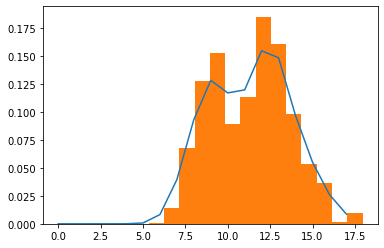

In [8]:
#Graficas de los datos reales (logaritmicos) contra la estimación del kernel
x_ventas = np.arange(0,max(ventas_log),1)
plt.figure()
plt.plot(x_ventas,Ventas(x_ventas));
plt.hist(ventas_log,bins = 15, density = True);
plt.show()

### Probrando ajuste de distribuciones hipotéticas

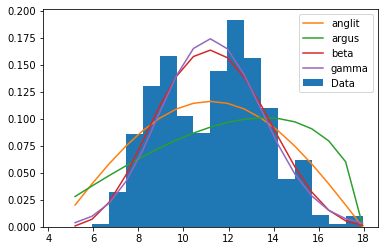

In [9]:
y, x ,_ = plt.hist(ventas_log, bins=18, density=True, label='Data')
x = x[1:]

dist = [d for d in dir(st) if isinstance(getattr(st,d), getattr(st, 'rv_continuous'))]
dist = dist[1:2] + dist[3:5] + ['gamma']
error = pd.DataFrame(index=dist, columns=['error'])

for d in dist:
    params= getattr(st,d).fit(ventas_log)
    y_hat = getattr(st, d)(*params).pdf(x)
    error.loc[d]= ((y-y_hat)**2).mean()
    plt.plot(x,y_hat, label=d)
    
plt.legend()
plt.show()

In [10]:
error_k=((y-Ventas(x_ventas))**2).mean()

In [11]:
nodo1_error = error.T
nodo1_error['kernel'] = error_k
nodo1_error

,anglit,argus,beta,gamma,kernel
error,0.00136168,0.00225215,0.000939502,0.00115211,0.004207


#### La distribución que mejor se ajusta a la distribución real es la de beta, esta distribución es incluso mejor que la del kernel 

> $H_0$: Los datos se distribuye como  una función de distribución beta 

> $H_a$: Los datos no se distribuyen como beta

### Pruebas de chi cuadrada

In [12]:
params = st.beta.fit(x)

pi = st.beta.pdf(x,*params)
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = 20-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)

Valor de chi cuadrado teorico  =  18.412900944896037
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=18.412900944896037, pvalue=0.363251479214953)
Estadístico de chi_cuadrado =  27.58711163827534


### Se rechaza $H_o$ ya que el valor de $p_{value}$ es pequeño

### Prueba de cuantil-cuantil

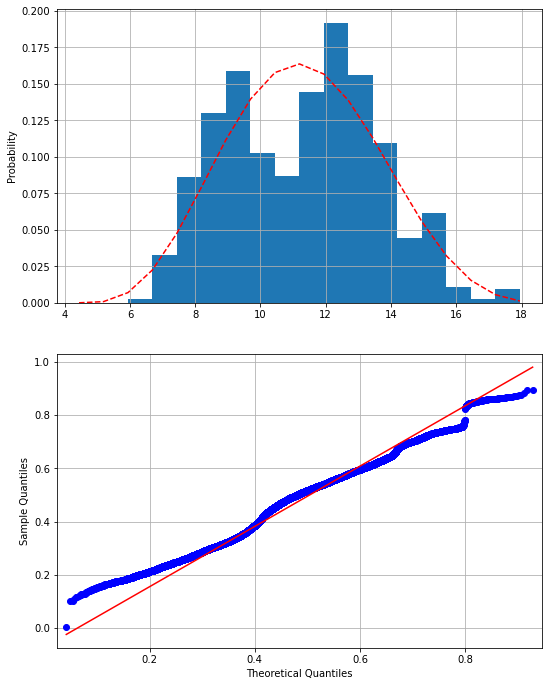

In [13]:
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(ventas_log, bins=18, density=True, label='Histograma mediciones')
dist = 'beta'
params = getattr(st, dist).fit(ventas_log)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()

grap1 = sm.qqplot(ventas_log, dist=getattr(st, dist), line='q', fit=True, ax=ax[1])
ax[1].grid()

#### Se rechaza $H_o$ ya que al realizar la prueba cuantil-cuantil podemos ver como es que los datos no se ajustan completamente.


#### Debido a que se rechazó la distribución beta, procedemos a realizar la distribución por medio de kernel.

### Distribución por Kernel

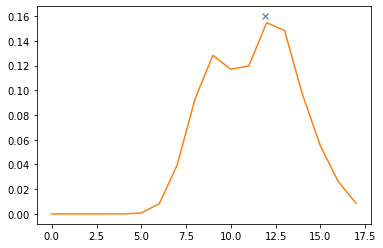

In [14]:
f = Ventas  #Definimos Kernel como f
x = np.arange(0,max(ventas_log),1) #Definimos el vector en el rango de las ventas

max_volumen = f(optimize.fmin(lambda x:-f(x),0,disp=False)) #Calculamos el valor máximo de la función

#Graficamos el punto máximo con el kernel
plt.plot(11.9,max_volumen,'x',lw = 50)

plt.plot(x,f(x))

### Simulación Montecarlo CRUDO -  Aceptación y Rechazo

In [15]:
np.random.seed(123)
N = 1000 # numero de variables que distribuyen como f a generar

# Usar func anteriormente definida como acep_rechazo_aleatorias que genera variables aleatorias
aleatorias_monte_ventas = acep_rechazo(f,max_volumen,N,18,1)

In [16]:
#Calculo de medias para montecarlo en escala logarítmica y escala real
media_monte_ventas_l = aleatorias_monte_ventas.mean()
media_monte_ventas_r = np.exp(media_monte_ventas_l)

#Calculo de medias reales en escala logarítmica y escala real
media_ventas_log= ventas_log.mean()
media_ventas_r= np.exp(ventas_log.mean())

In [17]:
nodo1_medias= pd.DataFrame(index=['Medias'] , columns=['Montecarlo logarítmico', 'Real logarítmico',
                                                     'Montecarlo', 'Real'])
nodo1_medias['Montecarlo logarítmico'] = media_monte_ventas_l
nodo1_medias['Real logarítmico'] = media_ventas_log
nodo1_medias['Montecarlo'] =  media_monte_ventas_r
nodo1_medias['Real'] = media_ventas_r

nodo1_medias

,Montecarlo logarítmico,Real logarítmico,Montecarlo,Real
Medias,11.289097,11.316294,79945.237585,82149.345433


comentarios....

### Histograma de los datos

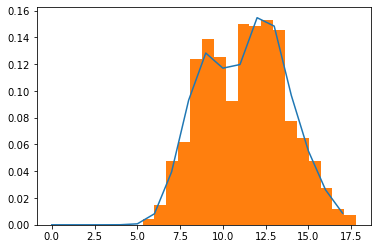

In [18]:
x_ventas = np.arange(0,max(ventas_log),1)
plt.figure()
plt.plot(x,f(x))
plt.hist(aleatorias_monte_ventas, bins = 18, density = True)
plt.show()

### Intervalo de Confianza y Error Porcentual

In [19]:
np.random.seed(123)

# Nivel de confianza
confianza = 0.95
X = aleatorias_monte_ventas

i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))

media_ventas = np.mean(X)


print('Con una confianza de %2.2f la media del volumen total de ventas por montecarlo '
      'crudo  estará en el intervalo t normal,\n %s' %(confianza,i1))
print('Media calculada por montecarlo crudo del volumen total de ventas' ,media_ventas)

error_nodo1 = abs(np.array(ventas_log.mean() - media_ventas)/media_ventas)
porcentaje=error_nodo1*100
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', round(porcentaje,2),'%')

Con una confianza de 0.95 la media del volumen total de ventas por montecarlo crudo  estará en el intervalo t normal,
 (11.14015528065948, 11.438039017481815)
Media calculada por montecarlo crudo del volumen total de ventas 11.289097149070647
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 0.24 %


In [20]:
i2 = np.exp(st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X)))

print('Con una confianza de %2.2f la media del volumen total de ventas por montecarlo '
      'crudo  estará en el intervalo t normal,\n %s' %(confianza,i2))
print('Media calculada por montecarlo crudo del volumen total de ventas' ,np.exp(media_ventas))

error_nodo1 = abs(np.array(np.exp(ventas_log.mean()) - np.exp(media_ventas))/(np.exp(media_ventas)))
porcentaje=error_nodo1*100
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', round(porcentaje,2),'%')

Con una confianza de 0.95 la media del volumen total de ventas por montecarlo crudo  estará en el intervalo t normal,
 [68882.35171065 92784.8839913 ]
Media calculada por montecarlo crudo del volumen total de ventas 79945.23758499135
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 2.76 %


### Calcular Montecarlo con Método de Reducción de Varianza

In [21]:
def estratificado(N:'Cantidad de Estratos'):
    B = N
    U = np.random.uniform(N) 
    i = np.arange(0, B)
    m_estratificado =((U + i )/B)
    return m_estratificado

estratificado(18)

array([0.34222355, 0.3977791 , 0.45333466, 0.50889021, 0.56444577,
       0.62000132, 0.67555688, 0.73111244, 0.78666799, 0.84222355,
       0.8977791 , 0.95333466, 1.00889021, 1.06444577, 1.12000132,
       1.17555688, 1.23111244, 1.28666799])

In [22]:
def acep_rechazo_strat_pos(f:'función objetivo a generar',
                           max_f:'maximo de la funcion',
                           N: 'numero de variables aleatorias distribuidas a generar',
                           B: 'Estratos',
                           m: 'maximo en x'):
    X = np.zeros(N)
    i = 0
    B = B
    U2 = np.random.rand(B)
    k = np.arange(0,B)
    v = (U2+k)/B
    j = 0
    while i < N:
        R2 = np.random.uniform(0,max_f)
        R1 = m * v[j]
        j += 1
        if R2 < f([R1]):
            X[i] = R1
            i+=1
    return X

#var_aleatorias_strat_p = acep_rechazo_strat_pos(f,max_volumen,N,5,18)
#len(var_aleatorias_strat_p)

### Histograma de los datos

### Intervalo de Confianza y Error Porcentual

### Comparación de resultados (Montecarlo Crudo vs RV)

## Conclusiones Nodo 1

## Nodo 2: Precio Promedio (Por pieza)

Para empezar con la simulación de los datos utilizamos la implementación de KDE correspondiente a Scipy ``gaussian_kde``. Para correrlo utilizamos la función vista en clase presentada al inicio de las simulaciones de los nodos. 

Una vez definida la función la usamos con los datos que tenemos sobre el precio promedio, como no tenemos el valor ``x_grid`` que requeria la función original, modificamos la función para que como resultado nos diera una función tal como se muestra enseguida:

In [26]:
precios = data['AveragePrice']

In [27]:
prices = kde_scipy_2(data['AveragePrice'])
prices

<function __main__.kde_scipy_2.<locals>.<lambda>(x_grid)>

Creamos un eje x tomando en cuenta tanto el valor máximo como mínimo para delimitar el rango, para usarlo posteriormente como el argurmento de prices para generar la linea de la estimación por Kernel.
Del mismo modo graficamos el histograma de los precios para poder hacer una comparación de los resultados obtenidos.
En el grafico que se presenta en la siguiente celda se puede ver claramente como es que con la KDE se obtiene una linea que ciertamente replica el comportamiento de los datos reales mostrados en el histograma.

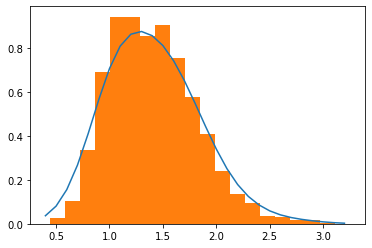

In [28]:
x_precio = np.arange(0.40,3.30,.10)
plt.figure()
plt.plot(x_precio,prices(x_precio))
plt.hist(precios,bins = 20, density = True)
plt.show()

Una vez comprobado visualmente que la estimación KDE es buena, procedemos con la aplicación del Método Aceptación y Rechazo. 
Para este método encontramos primero el punto máximo de la estimación y lo graficamos para poder visualizarlo.
Después de esto haciendo uso de la función creada en clase, creamos las variables aleatorias con la función generada en KDE, el valor máximo de esta misma función y el número de variables que queremos generar.

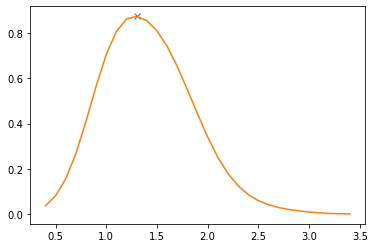

In [29]:
f = prices
x = np.arange(0.40,3.50,.10)

max_precio = f(optimize.fmin(lambda x:-f(x),0,disp=False))

plt.plot(1.30,max_precio,'x',lw = 10)

plt.plot(x,prices(x))

### Simulación Montecarlo CRUDO - Aceptación y Rechazo

In [30]:
np.random.seed(123)
N = 1000 # numero de variables que distribuyen como f a generar

# Usar func anteriormente definida como acep_rechazo_aleatorias que genera variables aleatorias
var_aleatorias_montecarlo_prices = acep_rechazo(f,max_precio,N,4,1)

Una vez realizada la simulación Montecarlo procedemos a comparar el valor medio de los datos simulados contra el valor medio de los datos realos obteniendo lo siguiente:

In [31]:
print('La media de las variables aleatorias es de', var_aleatorias_montecarlo_prices.mean() )

La media de las variables aleatorias es de 1.40127829663497


In [32]:
print('La media real de nuestros datos es de', data['AveragePrice'].mean() )

La media real de nuestros datos es de 1.4059784097758825


Como visualización presentamos el historgrama de los datos simulados en las celdas anteriores, comparado con la función que resulta del KDE. Se puede apreciar que ambas tienen un comportamiento similar y la mayoría de los datos simulados se encuentran dentro de la línea KDE.

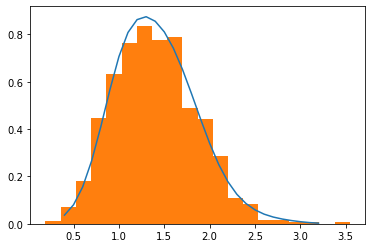

In [33]:
x = np.arange(0.4,3.30,.10)
plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_montecarlo_prices, bins = 20, density = True)
plt.show()

### Intervalo de Confianza y Error Porcentual

In [34]:
np.random.seed(123)

# Nivel de confianza
confianza = 0.95
X = var_aleatorias_montecarlo_prices

i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))

media_prices = np.mean(X)


print('Con una confianza de %2.2f la media del numero de positivos por montecarlo crudo  estará en el intervalo t normal,\n %s' %(confianza,i1))
print('Media calculada por montecarlo crudo del numero de positivos' ,media_prices)

error_positivos = abs(np.array(data['AveragePrice'].mean() - media_prices)/media_prices)
porcentaje=error_positivos*100
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', round(porcentaje,2),'%')

Con una confianza de 0.95 la media del numero de positivos por montecarlo crudo  estará en el intervalo t normal,
 (1.3730005251827815, 1.4295560680871584)
Media calculada por montecarlo crudo del numero de positivos 1.40127829663497
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 0.34 %


### Simulación Montecarlo con Metodo de reducción de varianza 

In [ ]:
# Histograma 

### Intervalo de Confianza y Error Porcentual

### Probando ajuste de distribuciones hipotéticas

C:\Users\lyhae\.anaconda\a\lib\site-packages\scipy\stats\_continuous_distns.py:496: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))
C:\Users\lyhae\.anaconda\a\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


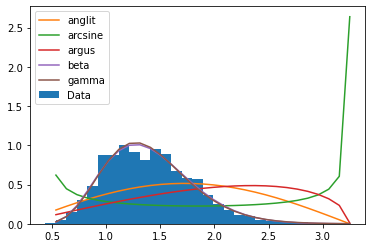

In [35]:
y, x ,_ = plt.hist(data['AveragePrice'], bins=29, density=True, label='Data')
x = x[1:]

dist = [d for d in dir(st) if isinstance(getattr(st,d), getattr(st, 'rv_continuous'))]
dist = dist[1:5] + ['gamma']
error = pd.DataFrame(index=dist, columns=['error'])

for d in dist:
    params= getattr(st,d).fit(data['AveragePrice'])
    y_hat = getattr(st, d)(*params).pdf(x)
    error.loc[d]= ((y-y_hat)**2).mean()
    plt.plot(x,y_hat, label=d)
    
plt.legend()
plt.show()

In [36]:
error_k2=((y-prices(x_precio))**2).mean()
#print('El error del kernel es de:',error_k2)

In [37]:
nodo2_error = error.T
nodo2_error['kernel'] = error_k2
nodo2_error

,anglit,arcsine,argus,beta,gamma,kernel
error,0.0772404,0.417052,0.142024,0.00495234,0.00541368,0.007759


#### La distribución que mejor se ajusta es la distribución beta

> $H_0$: Los datos se distribuye como  una función de distribución beta 

> $H_a$: Los datos no se distribuyen como beta

In [38]:
params = st.beta.fit(x)
params

(0.9562072456576903,
 0.9972650532345475,
 0.5368965517241379,
 2.7206843757193724)

In [39]:
pi = st.beta.pdf(x,*params)
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = 20-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)

Valor de chi cuadrado teorico  =  15.082140107108541
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=15.082140107108541, pvalue=0.9775555957214122)
Estadístico de chi_cuadrado =  27.58711163827534


#### Se acepta la $H_0$ porque  $x^{2}<x^{2}_{1-\alpha, m'}$, por lo tanto no podemos rechazar que los datos se distribuyen como una función beta, además el $p_{value}$ es grande

### Prueba de cuantil-cuantil

C:\Users\lyhae\.anaconda\a\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\lyhae\.anaconda\a\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


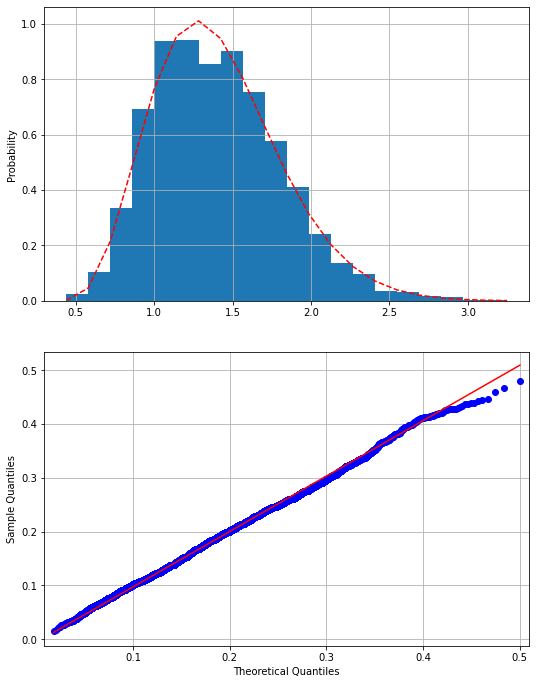

In [40]:
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(data['AveragePrice'], bins=20, density=True, label='Histograma mediciones')
dist = 'beta'
params = getattr(st, dist).fit(data['AveragePrice'])
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()

grap1 = sm.qqplot(data['AveragePrice'], dist=getattr(st, dist), line='q', fit=True, ax=ax[1])
ax[1].grid()

#### La distribución beta se asemeja mucho a los datos reales

## Simulación de la distribución BETA

In [41]:
samp = st.beta.rvs(*params, size=1000) 
samp.mean(), len(samp)

(1.4066766307398166, 1000)

In [42]:
print('La media de las variables aleatorias con distribución BETA es de', samp.mean() )

La media de las variables aleatorias con distribución BETA es de 1.4066766307398166


In [43]:
print('La media real de nuestros datos es de', data['AveragePrice'].mean() )

La media real de nuestros datos es de 1.4059784097758825


### Intervalo de Confianza y Error Porcentual

In [44]:
np.random.seed(123)

# Nivel de confianza
confianza = 0.95
X = samp

i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))

media_prices = np.mean(X)


print('Con una confianza de %2.2f la media del numero de positivos por montecarlo crudo, estará en el intervalo t normal,\n %s' %(confianza,i1))
print('Media calculada por montecarlo crudo del numero de positivos' ,media_prices)

error_positivos = abs(np.array(data['AveragePrice'].mean() - media_prices)/media_prices)
porcentaje = error_positivos*100
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', round(porcentaje,2),'%')

Con una confianza de 0.95 la media del numero de positivos por montecarlo crudo, estará en el intervalo t normal,
 (1.3817300716421956, 1.4316231898374376)
Media calculada por montecarlo crudo del numero de positivos 1.4066766307398166
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 0.05 %


### Simulación Montecarlo con Metodo de reducción de varianza 

In [49]:
def estratificado(N:'Numero de variables'):
    B = N
    U = np.random.uniform(B) 
    i = np.arange(0, B)
    m_estratificado =((U + i )/B)
    return m_estratificado


def muestreo_est(B: 'Número de estratos'):
    u= np.random.uniform(B) 
    i=np.arange(0,B) 
    v = (u+i)/B 
    return v 

def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Tener en cuenta que este arreglo cuenta números empezando del 0'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v

def Gen_distr_discreta_(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y


In [46]:
acumulada = st.beta.cdf(samp,*params)
len(acumulada)

1000

In [54]:
Gen_distr_discreta_(acumulada,samp,1000).mean()

1.401705017818324

In [ ]:
# Histograma 

In [60]:
#Estratificado
N = 1000
u =  estratificado(N)
funcion2 = Gen_distr_discreta_(u,acumulada,N)
media2 = np.mean(funcion2)
media2

0.37070983879523733

### Intervalo de Confianza y Error Porcentual

### Resumen Funcion Beta VS Kernel

## Conclusión Nodo 2